## <h1 style="text-align: center;">FLIGHT PRICE PREDICTION</h1>

<h5 style="text-align: center;">_________________________________________________________________________________________</h5>

# Table of Contents:
# ________________________________________________________________________________________



## Introduction
#### Overview of Flight Fare Prediction

## Importing Libraries
#### Required Libraries and Modules

## Importing Dataset
#### Loading the Dataset
#### Dataset Overview

## Exploratory Data Analysis (EDA)
#### Basic Information and Initial Exploration
#### Missing Values and Data Cleaning
#### Pandas Profiling Report
#### Data Visualization
##### - Distribution of Categorical Columns
##### - Histograms of Numerical Columns
##### - Distribution of Departure Times
##### - Flight Class Distribution
##### - Number of Stops Distribution
##### - Flight Duration Distribution
##### - Flight Prices Distribution
##### - Days Left Until Departure Distribution
##### - Duration Distribution by Airline
##### - Duration Distribution by Flight Class
##### - Price vs Duration Based on Flight Class

## Data Preprocessing
#### Encoding Categorical Variables
#### Data Transformation
#### Checking for Outliers
#### Distribution and Skewness Analysis
#### Correlation Heatmap

## Feature and Target Variable Definition
#### Defining Features (X) and Target Variable (Y)
#### Train-Test Split

## Model Building and Evaluation
#### Regression Models
#### Linear Regression
#### K-Neighbors Regressor
#### Decision Tree Regressor
#### Random Forest Regressor
#### XGBRegressor
#### CatBoost Regressor
#### AdaBoost Regressor


## Model Performance Metrics
#### R-squared
#### Mean Absolute Error (MAE)
#### Mean Squared Error (MSE)
#### Root Mean Squared Error (RMSE)

## Model Comparison
#### Scatter Plot of Predicted vs Actual Prices
#### Random Forest Regressor Performance

## Ordinary Least Squares (OLS) Model
#### Fitting and Summary of OLS Model

## Residual Analysis
#### Residual Distribution for Training and Testing Sets

## Model Building on Scaled Data
#### Feature Scaling with StandardScaler
#### Model Performance on Scaled Data

## Polynomial Features
#### Polynomial Regression Model

## Testing Data
#### Predictions on New Data
#### Actual vs Predicted Prices Visualization

## Model Accuracy Comparison
#### Summary of Model Accuracy
#### R-squared Comparison Bar Chart

## Conclusion
#### Summary of Findings


# ________________________________________________________________________________________

# Problem Statement:
### The problem is to predict the price or revenue generated by a fight event based on historical data of past fight events, taking into account various influencing factors such as fighter popularity, fight type, location, and ticket sales. This problem can be framed as a regression problem (predicting a continuous price value) 

# Importing Library
# ________________________________________________________________________________________

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as srm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# ________________________________________________________________________________________

# Importing Dataset

#### In this step, we will load our dataset, Clean_Dataset.csv, which contains information about flights, including airline, flight number,source and destination cities, departure and arrival times, stops, class, duration, days left to the flight, and price. We will use pandas to read the CSV file into a DataFrame.

In [12]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Dataset.csv")

# ________________________________________________________________________________________

# Exploratory Data Analysis

#### Here, we will explore the basic information about our dataset, such as the number of rows and columns, data types of each column, and any missing values. This will help us understand the structure of the data and identify any preprocessing steps that may be needed.

In [16]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [18]:
df.shape

(300153, 12)

In [19]:
df.describe().style.set_properties(**{'background-color': 'red'})

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [20]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [21]:
df.rename(columns={'class': 'flight_class'}, inplace=True)  

In [22]:
df.drop(['flight','Unnamed: 0'],axis =1,inplace=True)

In [23]:
for i in df.columns:
    print(i,df[i].unique())
    print('****************************************************')


airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
****************************************************
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
****************************************************
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
****************************************************
stops ['zero' 'one' 'two_or_more']
****************************************************
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
****************************************************
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
****************************************************
flight_class ['Economy' 'Business']
****************************************************
duration [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.8

# ________________________________________________________________________________________

# Data Visualization

# ________________________________________________________________________________________

#### Here we have visualizes the distribution of categorical columns from a dataset, including 'airline', 'source_city', 'destination_city', and 'flight_class'.Where it generates count plots for each column, displaying the frequency of unique values in descending order, with titles indicating the respective column names.

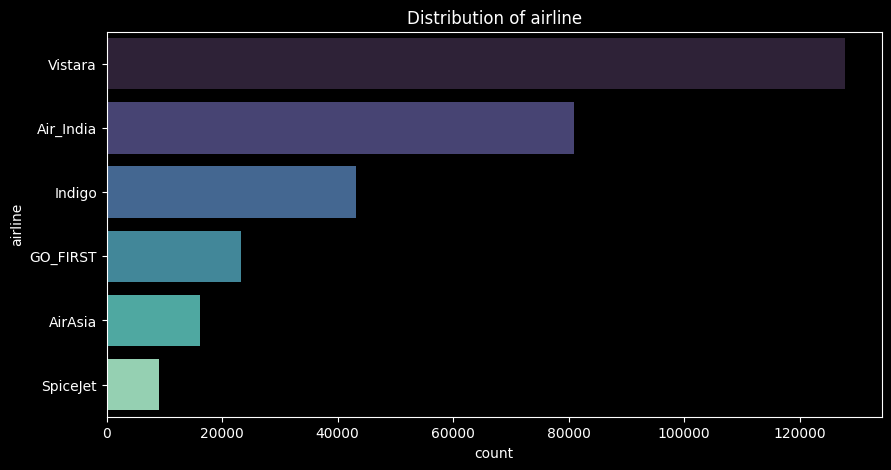

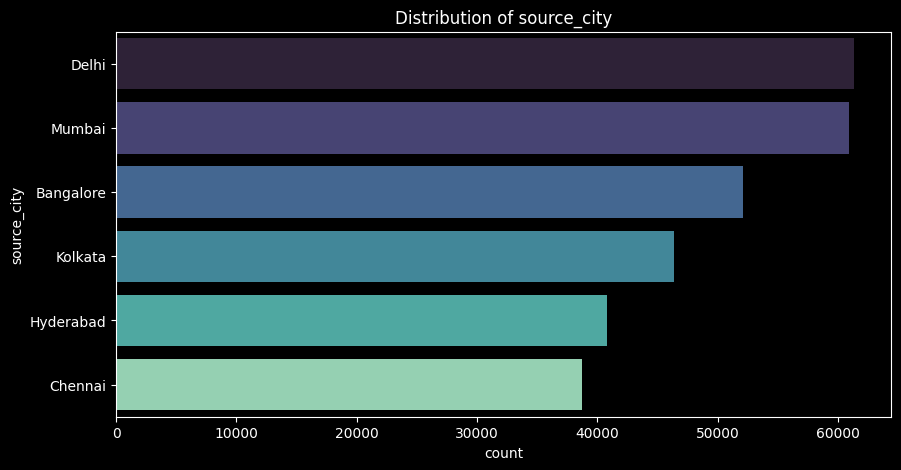

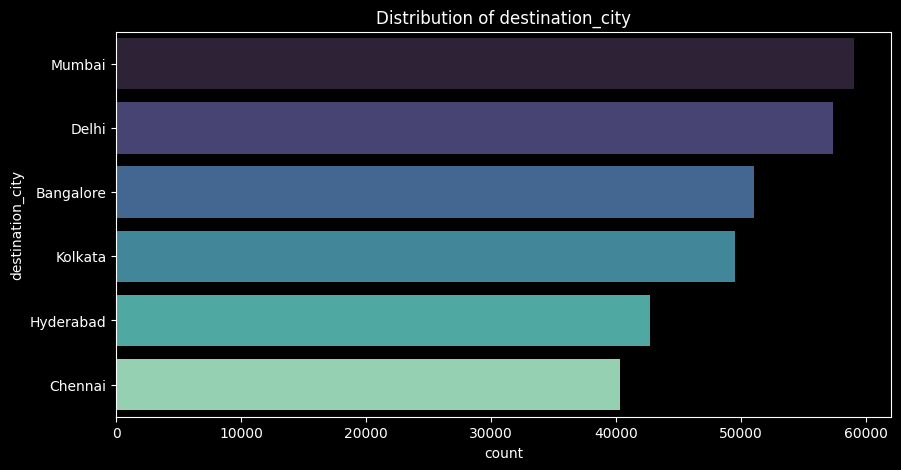

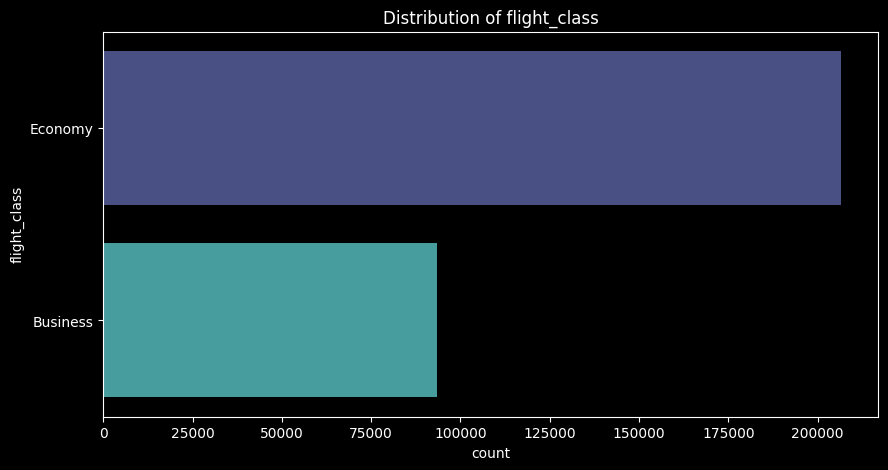

In [28]:
categorical_columns = ['airline', 'source_city', 'destination_city', 'flight_class']
for col in categorical_columns:
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='mako')
    plt.title(f'Distribution of {col}')
    plt.show()

#### Here we have generated histograms for all numerical columns where the histograms provide a visual summary of the data distribution.

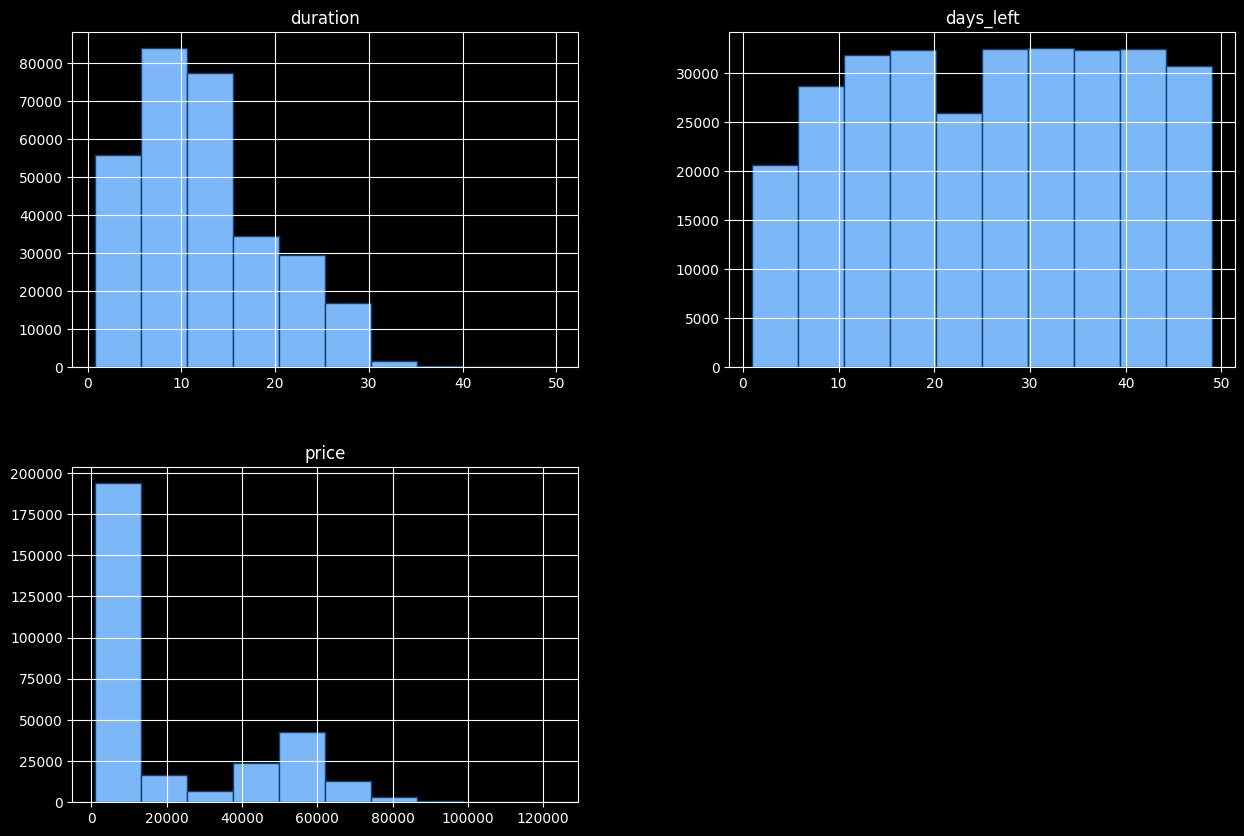

In [30]:
plt.style.use('dark_background')
df.hist(figsize=(15, 10), color='#7CB7F7', edgecolor='#0C427A')
plt.show()

#### Here we create a count plot to visualize the distribution of departure times from a dataset. And creates a bar plot showing the frequency of each unique departure time. This visualization helps in understanding how departure times are distributed across the dataset, highlighting common and less common departure times effectively.

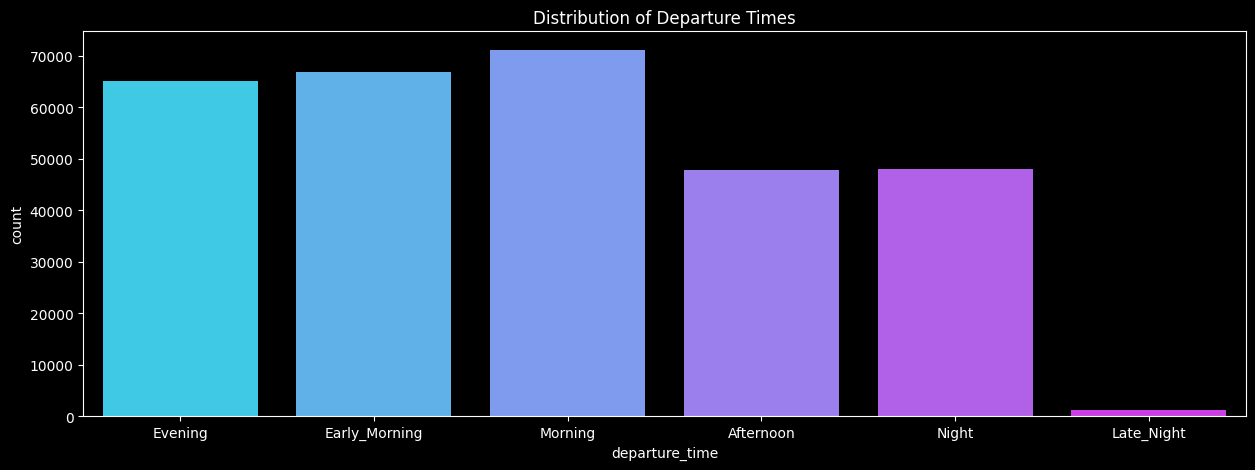

In [32]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 5))
sns.countplot(x=df['departure_time'],palette='cool')
plt.title('Distribution of Departure Times')
plt.show()

#### We generates a pie chart to visualize the distribution of different flight classes within a dataset.  This visualization helps in understanding the proportion of different flight classes in the dataset.

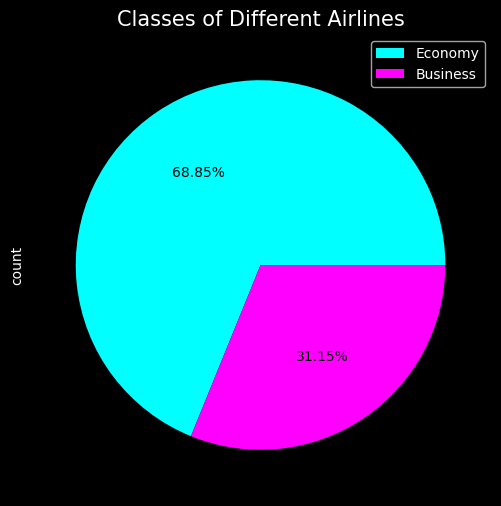

In [34]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
df['flight_class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f%%',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()


####  Visualizes the distribution of the number of stops in a dataset the statement outputs the count of each unique value in the 'stops' column to the console, providing a textual summary. This visualization helps in understanding how flights are distributed based on the number of stops, highlighting the most and least common values effectively.








stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64


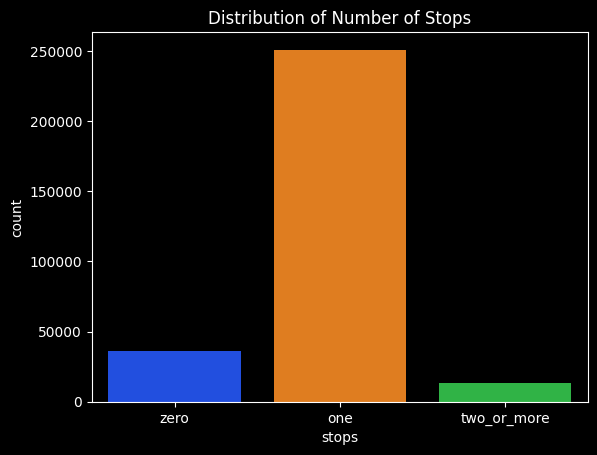

In [36]:
plt.style.use('dark_background')
print(df['stops'].value_counts())
sns.countplot(x=df['stops'],palette='bright')
plt.title('Distribution of Number of Stops')
plt.show()

#### Plots a histogram to visualize the distribution of flight durations in a dataset using a dark background style. The parameter adds a Kernel Density Estimate (KDE) curve to the histogram, providing a smoothed line that represents the data distribution. This histogram helps in understanding the distribution and frequency of flight durations in the dataset, highlighting common durations and the overall spread of the data.

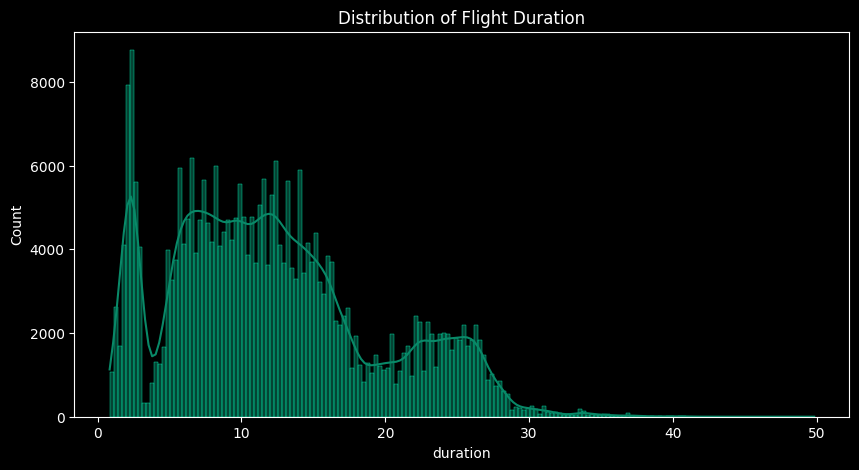

In [38]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], kde=True,color='#098968',edgecolor='#00FFBD')
plt.title('Distribution of Flight Duration')
plt.show()

#### Creates a histogram to visualize the distribution of flight prices in a dataset using a dark background style. This histogram helps in understanding the distribution and frequency of flight prices in the dataset, highlighting common price ranges and the overall spread of the data.

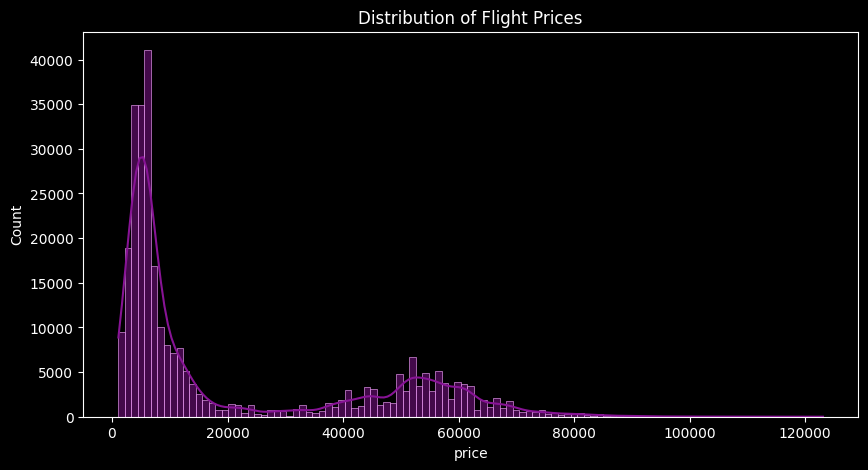

In [40]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, color='#871395',edgecolor='#E597EE')
plt.title('Distribution of Flight Prices')
plt.show()

#### Generates a histogram to visualize the distribution of the number of days left until departure in a dataset using a dark background style. This histogram helps in understanding the distribution and frequency of the number of days left until departure in the dataset, highlighting common timeframes and the overall spread of the data.

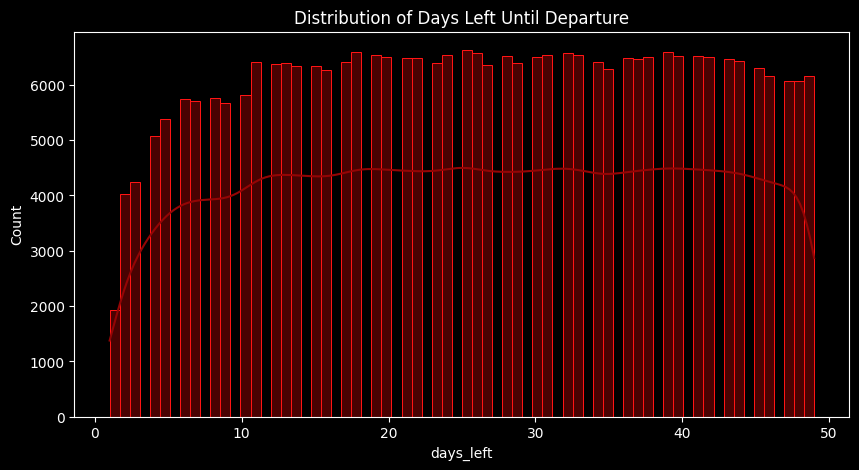

In [42]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.histplot(df['days_left'], kde=True,color='#930505',edgecolor='#FF1414')
plt.title('Distribution of Days Left Until Departure')
plt.show()


#### Creates a violin plot to visualize the distribution of flight durations across different airlines in a dataset. This violin plot helps in comparing the distribution of flight durations among different airlines, highlighting variations, and identifying patterns in flight durations.

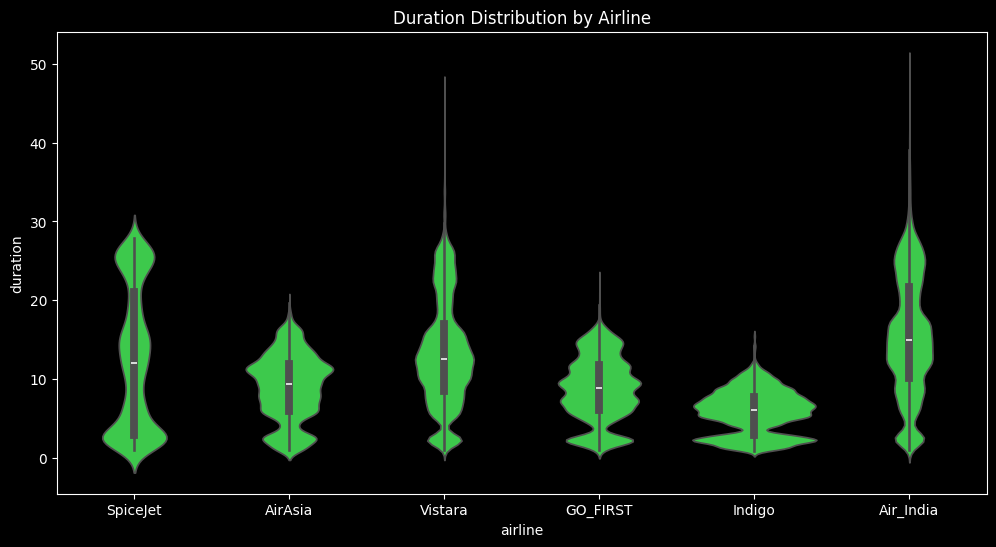

In [44]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.violinplot(data=df,x='airline', y='duration', color="#26E03A")
plt.title('Duration Distribution by Airline')
plt.show()

#### Generates a violin plot to display the distribution of flight durations for various flight classes in a dataset This visualization helps compare how flight durations vary across different flight classes, revealing patterns and differences effectivel

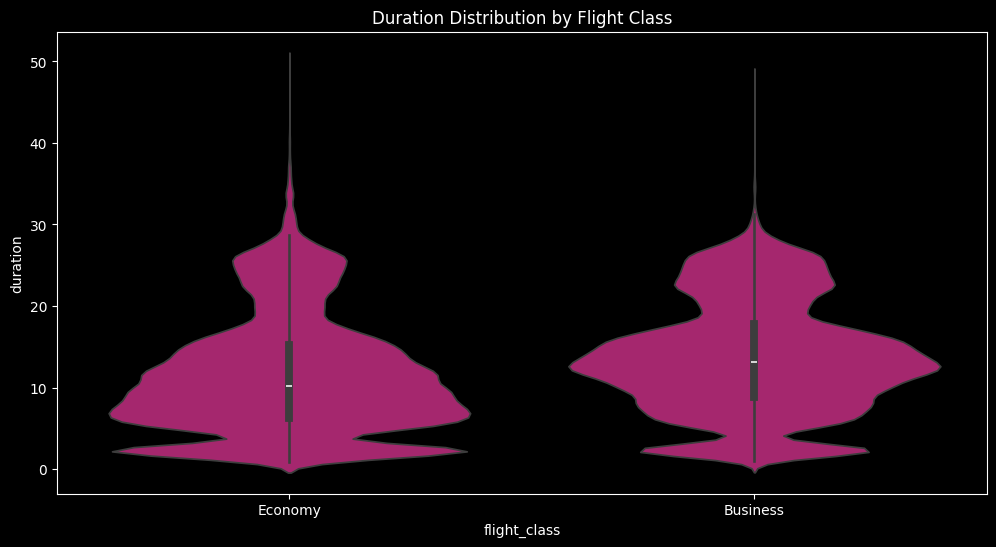

In [46]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.violinplot( data=df,x='flight_class', y='duration',color='#BA1270')
plt.title('Duration Distribution by Flight Class')
plt.show()

#### Creates a line plot to visualize the relationship between flight duration and price, categorized by flight class. This visualization helps in analyzing how flight duration affects price across different flight classes.

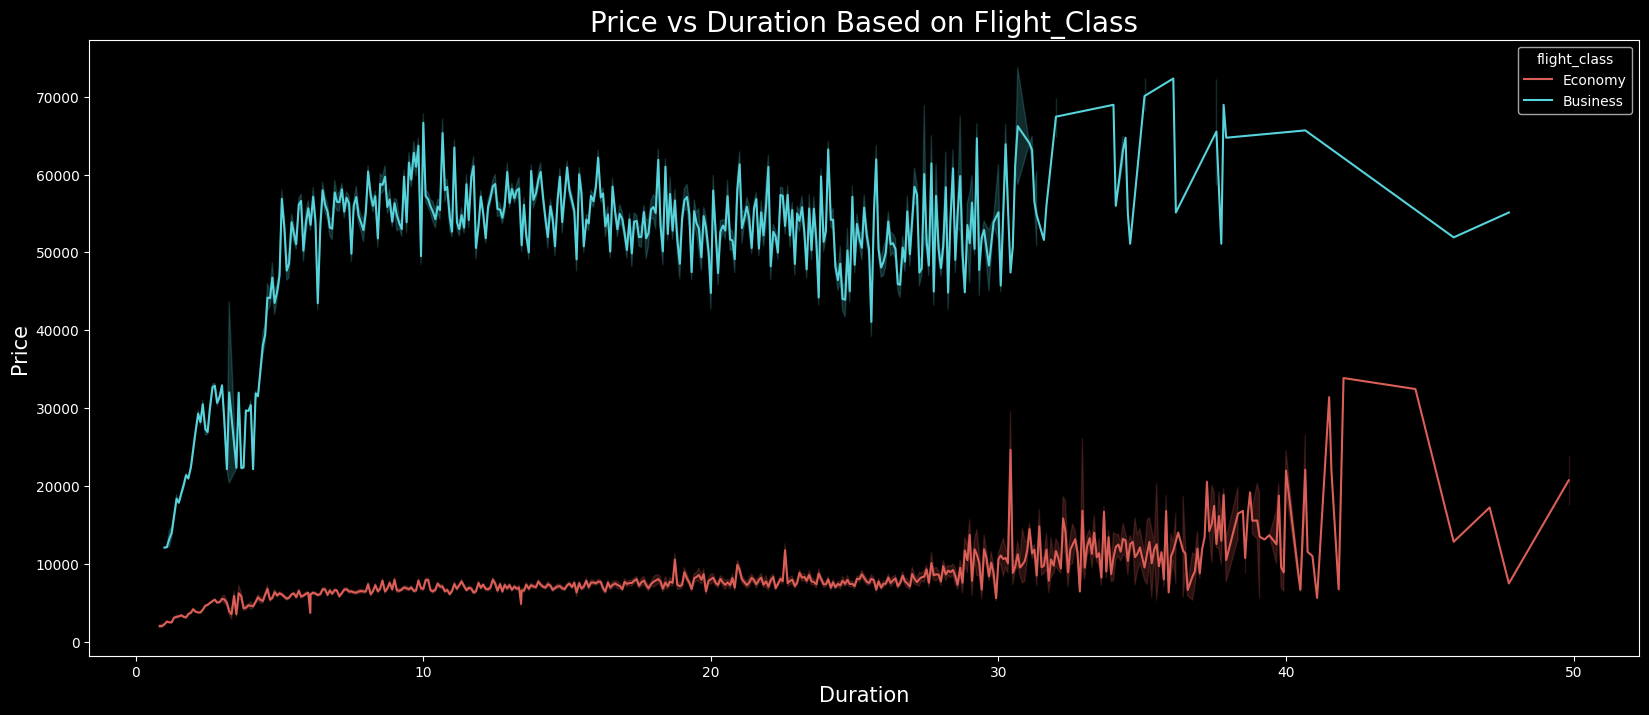

In [48]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='flight_class',palette='hls')
plt.title('Price vs Duration Based on Flight_Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# ________________________________________________________________________________________

# Data Preprocessing

# ________________________________________________________________________________________

#### Here we updates the column in the DataFrame df by replacing names with corresponding numerical codes. The  method is used to convert the categorical airline names into numerical values, which can be more suitable for various data analyses and machine learning models.  This transformation facilitates numerical operations and model input requirements.

In [53]:
df.airline = df.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6  
    }
)

In [54]:
df.source_city = df.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

In [55]:
df.departure_time = df.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2, 
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5, 
        'Late_Night' : 6
    }
)

In [56]:
df.stops = df.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [57]:
df.arrival_time = df.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [58]:

df.destination_city = df.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [59]:
df.flight_class = df.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [60]:
df.describe().style.set_properties(**{'background-color': '#10D3CA'})

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.153072,3.201487,2.794901,1.208480,2.498846,3.268316,1.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.407841,1.688644,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


# ________________________________________________________________________________________

#### Here we creates the box plot for checking the outliers in data of columns -->

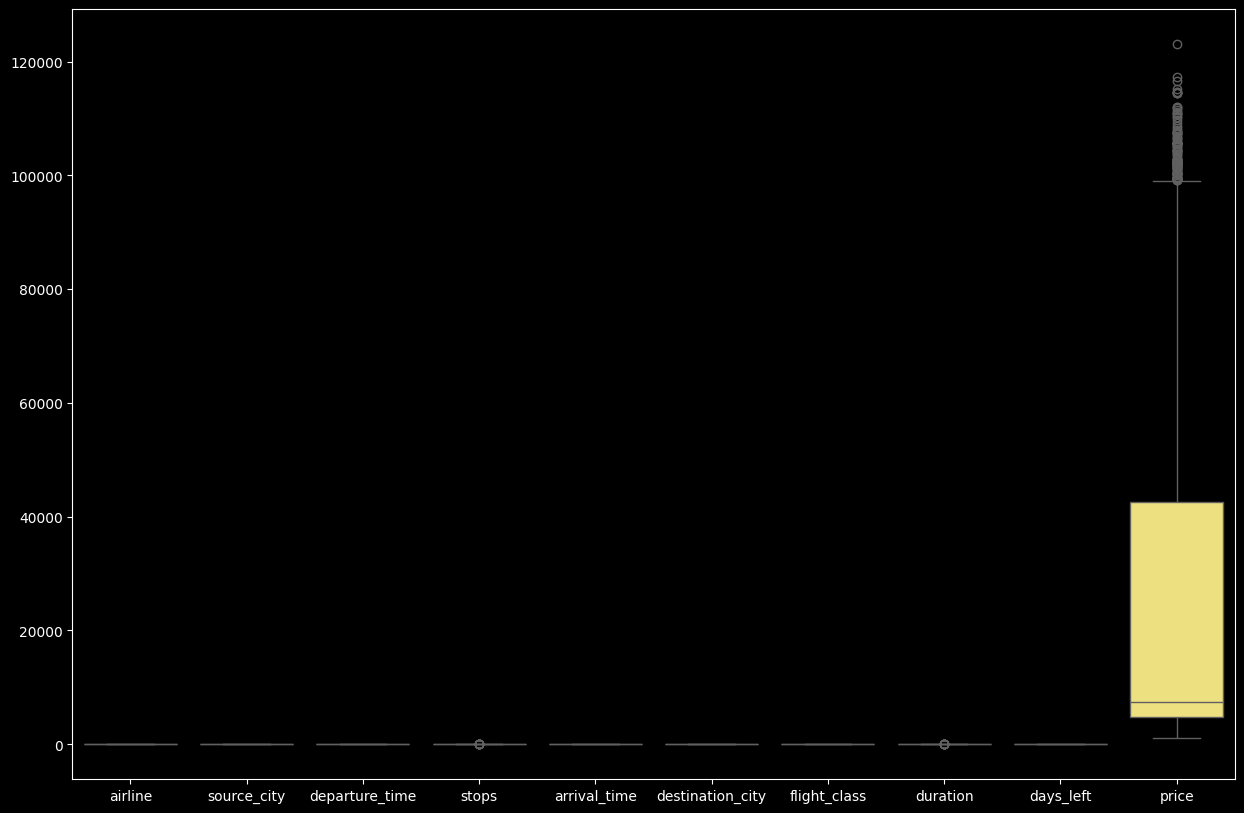

In [63]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.show()

# ________________________________________________________________________________________

#### For each columns in the dataframe we have created the displot to check the distribution of the columns and skewness

<Figure size 640x480 with 0 Axes>

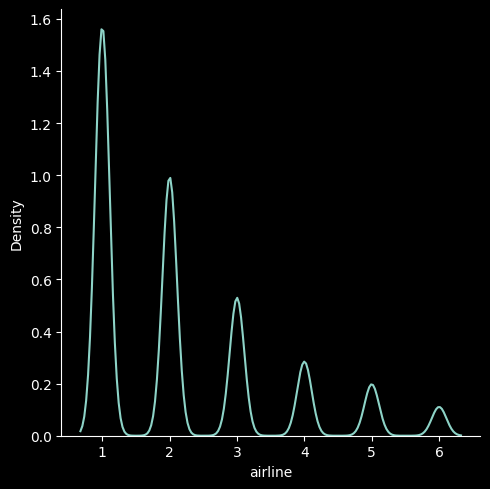

<Figure size 640x480 with 0 Axes>

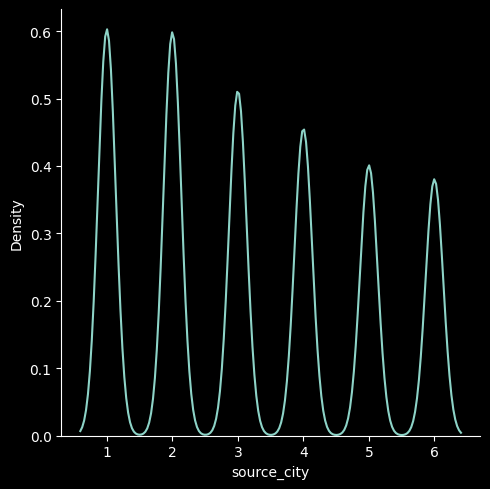

<Figure size 640x480 with 0 Axes>

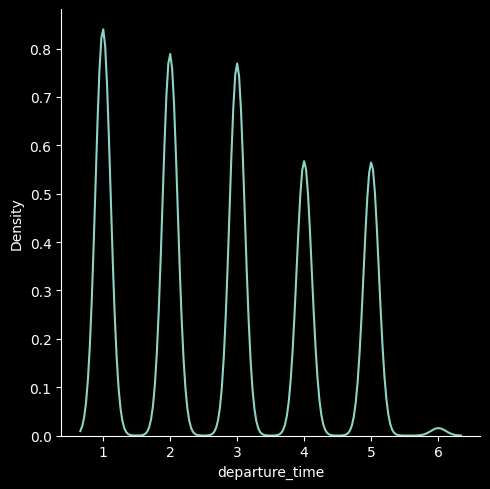

<Figure size 640x480 with 0 Axes>

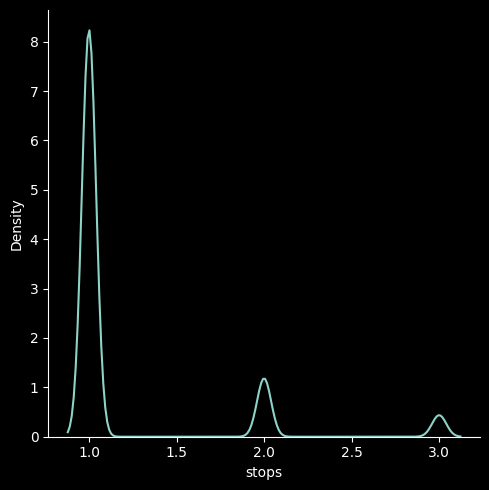

<Figure size 640x480 with 0 Axes>

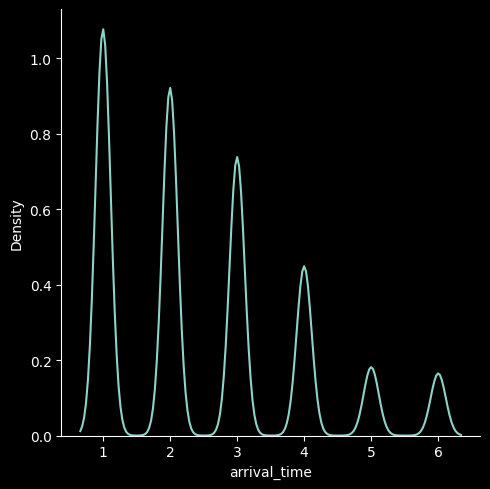

<Figure size 640x480 with 0 Axes>

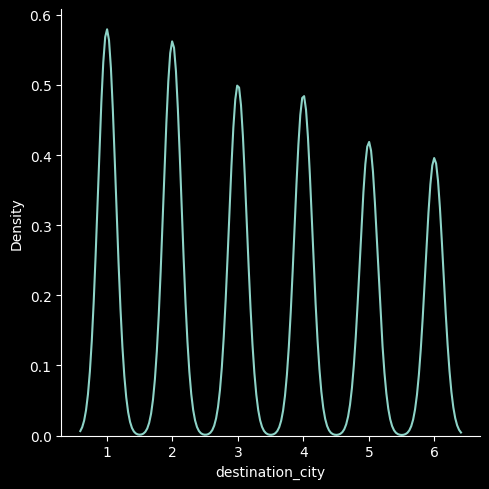

<Figure size 640x480 with 0 Axes>

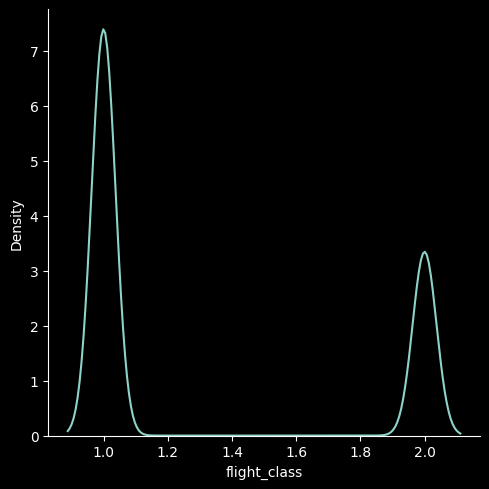

<Figure size 640x480 with 0 Axes>

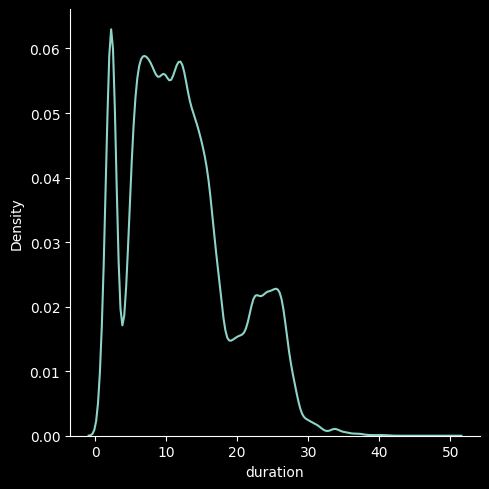

<Figure size 640x480 with 0 Axes>

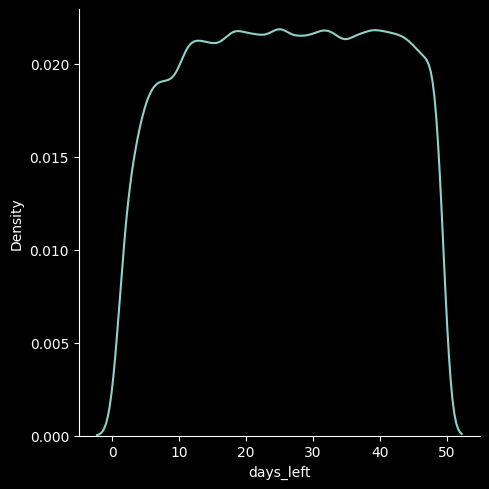

<Figure size 640x480 with 0 Axes>

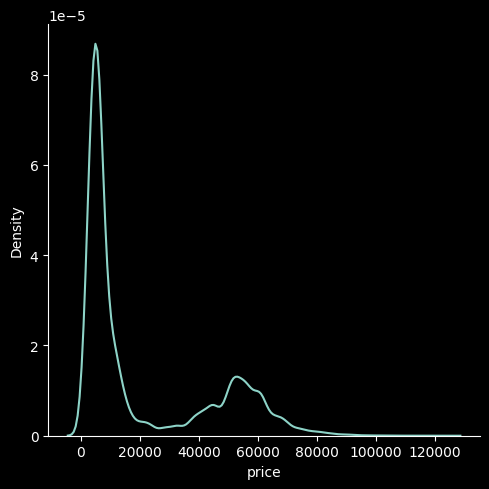

In [66]:
for i in df.columns:
    plt.figure()
    sns.displot(data=df,x=i,kind='kde')

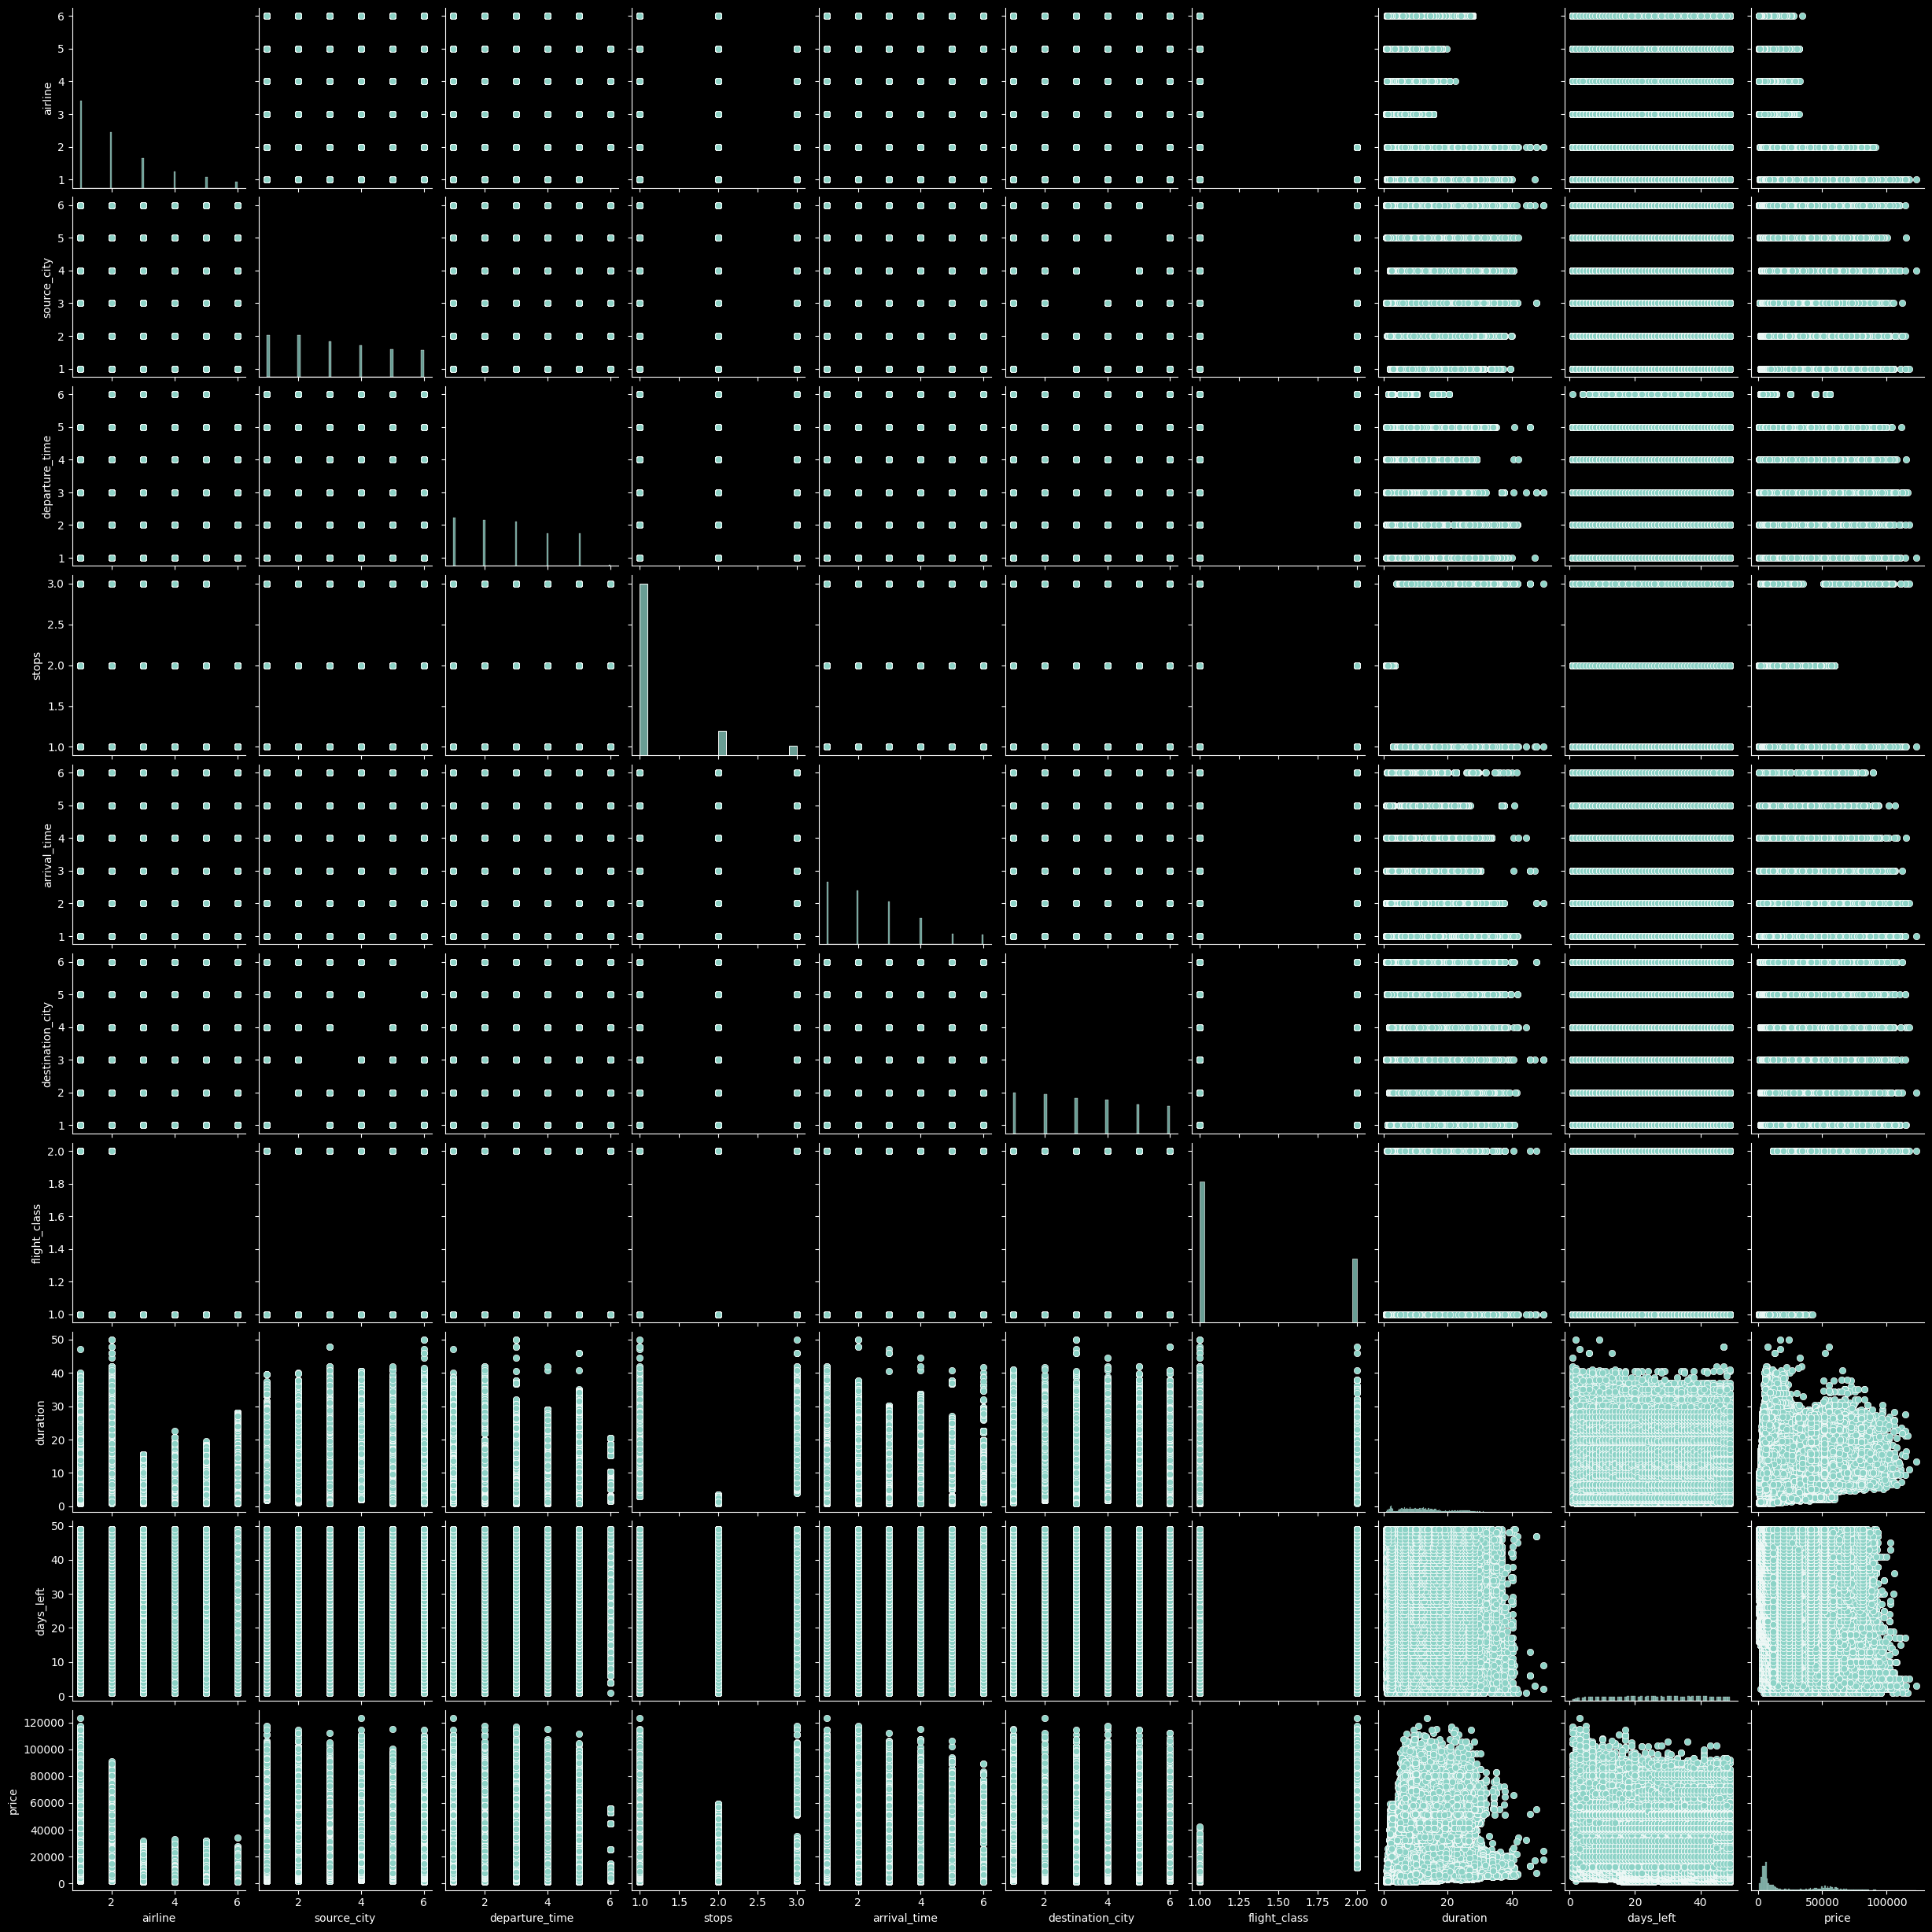

In [67]:
sns.pairplot(df)

### Generated the Heatmap to see the collinearity between the columns 

<Axes: >

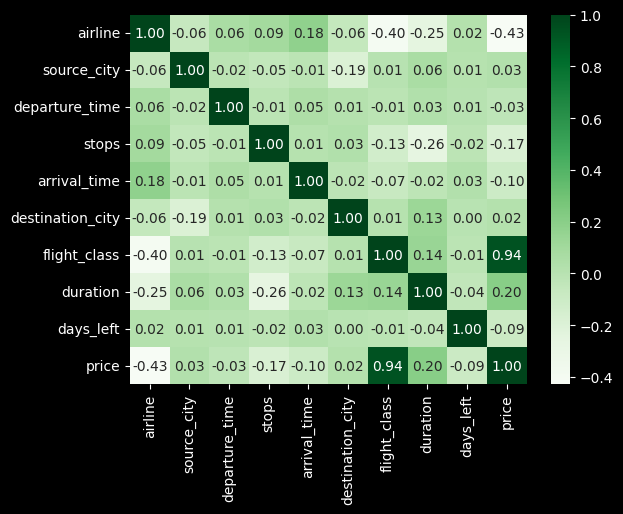

In [69]:
plt.style.use('dark_background')
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='white',cmap='Greens')

# ________________________________________________________________________________________

# Define x & y

#### Here, we will define our features (x) and target variable (y). In this case, our target variable is the flight price, and our features will include all other columns after preprocessing.

# ________________________________________________________________________________________

In [74]:
x=df.drop('price',axis=1)
y=df['price']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

# ________________________________________________________________________________________

# Model Building

#### Here we have created the model and the performance of various regression models, including Linear Regression, K-Neighbors Regressor, Decision Tree Regressor, XGBRegressor, CatBoost Regressor, AdaBoost Regressor. For each model, it fits the training data, makes predictions on both the training and testing datasets, and calculates performance metrics such as R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The results are printed for both the training and testing sets, allowing for a comprehensive comparison of model performance.

# ________________________________________________________________________________________

In [80]:
class_models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}


class_model_list = []
r2_score_list = []
mae_score_list = []
mse_score_list = []
rmse_score_list = []

for model_name, model in class_models.items():
    
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    class_model_list.append(model_name)
    r2_score_list.append(test_r2)
    mae_score_list.append(test_mae)
    mse_score_list.append(test_mse)
    rmse_score_list.append(test_rmse)

    print(model_name)
    print('Model performance for Training set')
    print("- R-squared: {:.4f}".format(train_r2))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- Mean Squared Error: {:.4f}".format(train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- R-squared: {:.4f}".format(test_r2))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- Mean Squared Error: {:.4f}".format(test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- R-squared: 0.8953
- Mean Absolute Error: 4533.8946
- Mean Squared Error: 53907249.6843
- Root Mean Squared Error: 7342.1557
----------------------------------
Model performance for Test set
- R-squared: 0.8950
- Mean Absolute Error: 4555.8746
- Mean Squared Error: 54262467.6481
- Root Mean Squared Error: 7366.3062


K-Neighbors Regressor
Model performance for Training set
- R-squared: 0.8502
- Mean Absolute Error: 5904.3134
- Mean Squared Error: 77099684.3202
- Root Mean Squared Error: 8780.6426
----------------------------------
Model performance for Test set
- R-squared: 0.7687
- Mean Absolute Error: 7385.8199
- Mean Squared Error: 119486673.8585
- Root Mean Squared Error: 10930.9960


Decision Tree Regressor
Model performance for Training set
- R-squared: 0.9993
- Mean Absolute Error: 57.6469
- Mean Squared Error: 366307.1640
- Root Mean Squared Error: 605.2331
----------------------------------
Model performance for Test set
- 

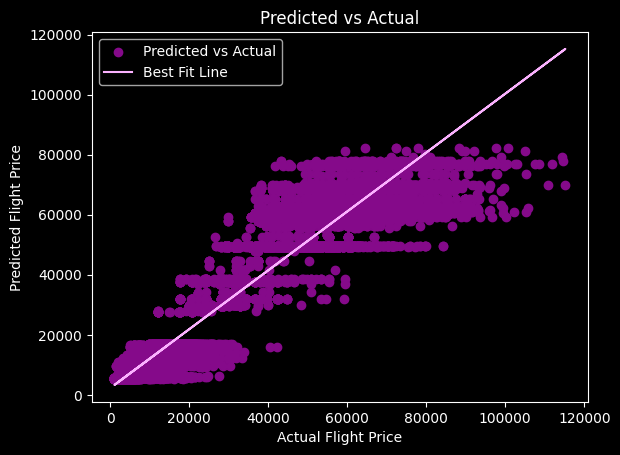

In [81]:
plt.scatter(y_test, y_test_pred, label='Predicted vs Actual',color='#850A8A')

m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m * y_test + b, color='#FBB2FF', label='Best Fit Line')
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

In [82]:
RM= RandomForestRegressor()

In [83]:
model=RM.fit(x_train,y_train)

In [84]:
y_pred_RM_train=model.predict(x_train)
print('Accuracy Score Training: ',r2_score(y_train,y_pred_RM_train))
y_pred_RM_test=model.predict(x_test)
print('Accuracy Score Testing: ',r2_score(y_test,y_pred_RM_test))

Accuracy Score Training:  0.9974811739264521
Accuracy Score Testing:  0.9850284680984736


# ________________________________________________________________________________________

# OLS Model

#### This script fits an Ordinary Least Squares (OLS) regression model to the training data using the statsmodels library. The OLS function is used to create the model, which is then fitted to the training data. The summary() method is called to generate a detailed summary of the regression results, including statistical metrics and coefficients, providing insights into the model’s performance and the relationships between the variables.

In [88]:
ols_model=srm.OLS(endog=y_train,exog=x_train).fit()

In [89]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          3.157e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):                        0.00
Time:                        11:21:00   Log-Likelihood:                     -2.5163e+06
No. Observations:              240122   AIC:                                  5.033e+06
Df Residuals:                  240113   BIC:                                  5.033e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
airline          -2375.7083     13.282   -178.871      0.000   -2401.740   -2349.677
source_city       -742.1476     10.008    -74.152      0.000    -761.764    -722.531
departure_time   -1003.8227     12.210    -82.211      0.000   -1027.755    -979.891
stops            -5874.7969     32.308   -181.835      0.000   -5938.121   -5811.473
arrival_time     -1034.3408     12.448    -83.095      0.000   -1058.738   -1009.944
destination_city  -716.6647     10.238    -70.004      0.000    -736.730    -696.599
flight_class      3.829e+04     34.065   1123.903      0.000    3.82e+04    3.84e+04
duration           -47.4336      2.492    -19.032      0.000     -52.318     -42.549
days_left         -222.3519      1.246   -178.467      0.000    -224.794    -219.910
==============================================================================
Omnibus:                    32875.311   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105269.678
Skew:                           0.708   Prob(JB):                         0.00
Kurtosis:                       5.918   Cond. No.                         67.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residue Plot

### These plots illustrate the distribution of residuals for both the training and testing datasets. The residuals, calculated as the difference between the actual and predicted values, are visualized using kernel density estimation (KDE) plots. The first plot shows the residuals distribution for the training data, while the second plot represents the residuals distribution for the testing data. The x-axis denotes the residuals, and the y-axis indicates the density. The titles and labels provide context for each plot, helping to assess the model’s performance and identify any patterns or biases in the predictions.

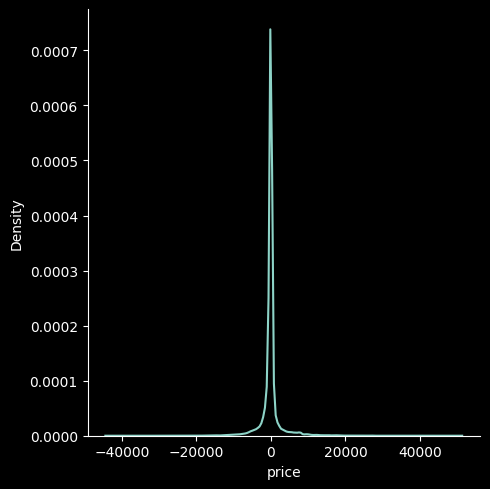

In [92]:
sns.displot(y_test-y_pred_RM_test,kind='kde')

# ________________________________________________________________________________________

#### The performance of the Lasso regression model with different alpha values. It iterates over a list of alpha values, fits the Lasso model to the training data, makes predictions on the test data, and calculates the R-squared score for each alpha value. The accuracy scores are stored in a list and printed at the end, allowing for comparison of model performance across different regularization strengths.

In [95]:

lst=[0.1,0.2,0.3,0.4,0.5]
accuracy=[]
for i in lst:
    la=Lasso(alpha=i)
    la.fit(x_train,y_train)
    y_pred_la=la.predict(x_test)
    acc=r2_score(y_test,y_pred_la)
    accuracy.append(acc)
print(accuracy)

NameError: name 'Lasso' is not defined

# ________________________________________________________________________________________

# Model Building On Scaled Data

#### The performance of various regression models after scaling the features using StandardScaler. The models include Linear Regression, K-Neighbors Regressor, Decision Tree Regressor, Random Forest Regressor, XGBRegressor, CatBoost Regressor, AdaBoost Regressor, and Bagging Regressor. For each model, it fits the scaled training data, makes predictions on both the training and testing datasets, and calculates performance metrics such as R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The results are printed for both the training and testing sets, allowing for a comprehensive comparison of model performance.

# ________________________________________________________________________________________

In [ ]:
ss=StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [ ]:
class_models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    
}


class_model_list = []
r2_score_list = []
mae_score_list = []
mse_score_list = []
rmse_score_list = []

for model_name, model in class_models.items():
    
    model.fit(x_train_scaled, y_train)

    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    class_model_list.append(model_name)
    r2_score_list.append(test_r2)
    mae_score_list.append(test_mae)
    mse_score_list.append(test_mse)
    rmse_score_list.append(test_rmse)

    print(model_name)
    print('Model performance for Training set')
    print("- R-squared: {:.4f}".format(train_r2))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- Mean Squared Error: {:.4f}".format(train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- R-squared: {:.4f}".format(test_r2))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- Mean Squared Error: {:.4f}".format(test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print('='*35)
    print('\n')


# ________________________________________________________________________________________

# Polynomial Feature

# ________________________________________________________________________________________

In [ ]:

from sklearn.preprocessing import PolynomialFeatures


In [ ]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_poly,y_train)


In [ ]:
y_pred_poly_train=lr.predict(x_train_poly)
print('Accuracy Score Training: ',r2_score(y_train,y_pred_poly_train))
y_pred_poly_test=lr.predict(x_test_poly)
print('Accuracy Score Testing: ',r2_score(y_test,y_pred_poly_test))

# ________________________________________________________________________________________

# Testing Data 

# ________________________________________________________________________________________

In [ ]:
df_new=x.tail(10)

In [ ]:
y_pred_new=RM.predict(df_new)

In [ ]:
y_pred_new

In [ ]:
df_new['Actual Price']=y.tail(10)

In [ ]:
df_new['Predicted Price'] = y_pred_new

In [ ]:
df_new

# 


________________________________________________________________________________________

### This scatter plot visualizes the comparison between actual and predicted flight prices. The blue dots represent the actual prices, while the red dots indicate the predicted prices. Additionally, dotted lines connect the points to highlight trends over the index. The x-axis represents the index, and the y-axis shows the price. The legend distinguishes between the actual and predicted prices, providing a clear visual representation of the model’s performance.

In [ ]:
plt.scatter(df_new.index, df_new['Actual Price'], color='blue', label='Actual Price')
plt.scatter(df_new.index, df_new['Predicted Price'], color='red', label='Predicted Price')
plt.plot(df_new.index, df_new['Actual Price'], color='blue', linestyle='dotted')
plt.plot(df_new.index, df_new['Predicted Price'], color='red', linestyle='dotted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Flight Prices')
plt.legend()
plt.show()

In [ ]:
model_accuracy = {
    'Model': ['Linear Regression', 'K-Neighbors Regressor', 'Random Forest Regressor', 
              'Decision Tree Regressor', 'XGBRegressor', 'CatBoost Regressor', 
              'AdaBoost Regressor'],
    
    'Training R-squared': [0.8953, 0.8502, 0.9974, 0.9993, 0.9773, 0.9757, 0.9297],
    
    'Test R-squared': [0.8950, 0.7687, 0.9850, 0.9758, 0.9765, 0.9752, 0.9305]
}


df_acc = pd.DataFrame(model_accuracy)

df_acc.head(11)


# ________________________________________________________________________________________

# Conclusion

# ________________________________________________________________________________________

#### The Random Forest Regressor excels in predicting flight fares with the highest Test R-squared value of 0.9850, indicating superior performance on new data. The Decision Tree Regressor, while showing high accuracy, is prone to overfitting. Linear Regression, Lasso, Ridge, and Elastic Net demonstrate consistent performance without overfitting but with lower accuracy. The K-Neighbors Regressor is the least effective model. Hence, the Random Forest Regressor is recommended for its accuracy and generalizability, though monitoring for overfitting is advised.

In [ ]:
import pickle

In [ ]:
with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
with open('random_forest_regressor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
predictions = loaded_model.predict(x_test)
